In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot  as plt 
import tensorflow 
from tensorflow import keras

from tensorflow.keras.datasets import fashion_mnist

2025-08-23 13:40:33.566742: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755956433.941760      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755956434.047484      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [15]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [4]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [20]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [13]:
y_train.shape

(60000, 10)

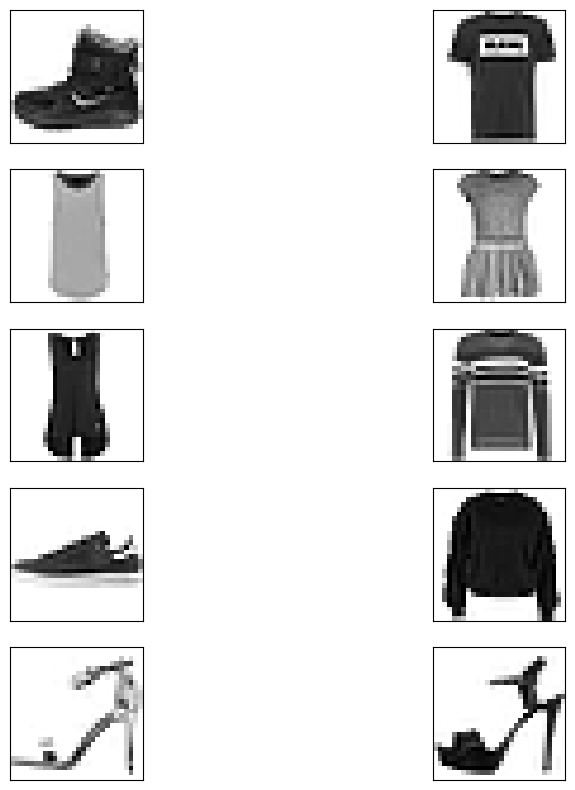

In [8]:
plt.figure(figsize=(10,10))

for i in range(10):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    # plt.axis("off")
    plt.grid(False)
    plt.imshow(x_train[i],cmap=plt.cm.binary)
plt.show()

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, MaxPooling2D, Conv2D, Dense

In [17]:
model = Sequential()

model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128,activation= 'relu'))
model.add(Dense(64,activation= 'relu'))
model.add(Dense(10,activation= 'softmax'))


model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 429,258 (1.64 MB)

 Trainable params: 429,258 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics =['accuracy'])

In [22]:
history = model.fit(x_train,y_train,epochs= 10,validation_data=(x_test,y_test),batch_size = 64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5511 - loss: 1.3731 - val_accuracy: 0.7818 - val_loss: 0.5849
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8008 - loss: 0.5370 - val_accuracy: 0.8178 - val_loss: 0.4900
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8382 - loss: 0.4429 - val_accuracy: 0.8456 - val_loss: 0.4224
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8554 - loss: 0.3952 - val_accuracy: 0.8525 - val_loss: 0.3996
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8666 - loss: 0.3674 - val_accuracy: 0.8623 - val_loss: 0.3760
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8716 - loss: 0.3471 - val_accuracy: 0.8692 - val_loss: 0.3606
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8810 - loss: 0.3288 - val_accuracy: 0.8704 - val_loss: 0.3653
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8876 - loss: 0.3087 - val_accuracy: 0.

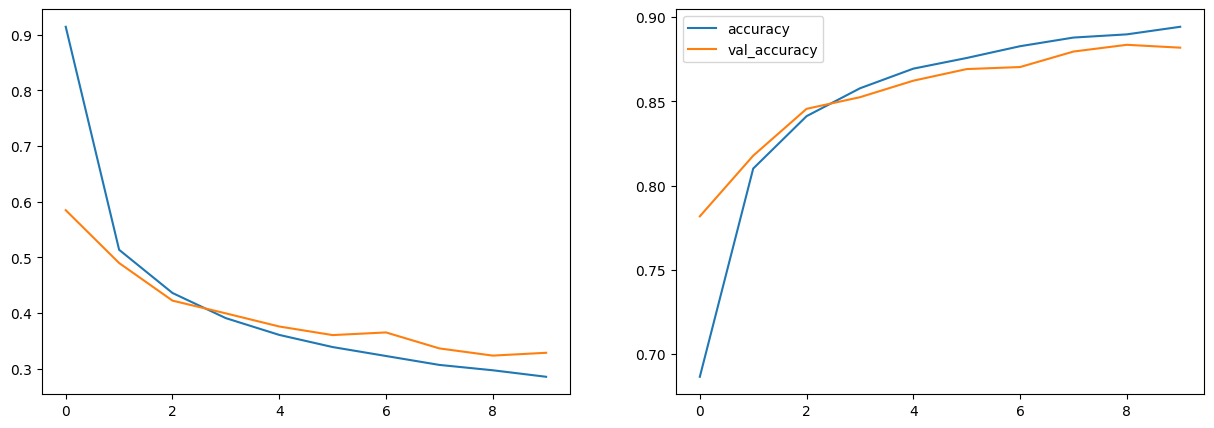

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.subplot(122)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [29]:
test_loss,test_accuracy = model.evaluate(x_test,y_test,verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.3288
Test Accuracy: 0.8819


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step
Predictions: [9 2 1 1 6]
True Labels: [9 2 1 1 6]


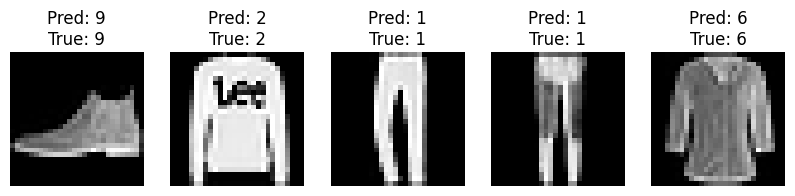

In [30]:
predictions = model.predict(x_test[:5])
predicted_digits = np.argmax(predictions, axis=1)

true_labels = np.argmax(y_test[:5], axis=1)

print("Predictions:", predicted_digits)
print("True Labels:", true_labels)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_digits[i]}\nTrue: {true_labels[i]}")
    plt.axis('off')
plt.show()

In [33]:
np.argmax(predictions, axis=1)

array([9, 2, 1, 1, 6])

## VGG16

In [11]:
import tensorflow as tf 
from keras.applications.vgg16 import VGG16
import numpy as np 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model



In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
x_train = np.array([tf.image.resize(img[..., np.newaxis], (48, 48)) for img in x_train])
x_test = np.array([tf.image.resize(img[..., np.newaxis], (48, 48)) for img in x_test])

x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)


x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

I0000 00:00:1755956454.568251      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1755956454.568962      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [ ]:
np.array([tf.image.resize(img[..., np.newaxis], (48, 48)) for img in x_test])

In [12]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

for layer in vgg16.layers:
    layer.trainable = False

inputs = Input(shape=(48, 48, 3))
x = vgg16(inputs)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test), verbose=1)

Epoch 1/5


I0000 00:00:1755956611.506606      98 service.cc:148] XLA service 0x7bb12002eb10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755956611.508023      98 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1755956611.508045      98 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1755956611.968978      98 cuda_dnn.cc:529] Loaded cuDNN version 90300


  7/938 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.1406 - loss: 2.2201

I0000 00:00:1755956615.695569      98 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 32ms/step - accuracy: 0.7689 - loss: 0.6819 - val_accuracy: 0.8477 - val_loss: 0.4283
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.8593 - loss: 0.3866 - val_accuracy: 0.8514 - val_loss: 0.4079
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.8716 - loss: 0.3491 - val_accuracy: 0.8672 - val_loss: 0.3714
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.8820 - loss: 0.3210 - val_accuracy: 0.8659 - val_loss: 0.3720
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.8877 - loss: 0.3057 - val_accuracy: 0.8720 - val_loss: 0.3621



Test Loss: 0.3621
Test Accuracy: 0.8720

Making predictions on the first 5 test images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Digits: [9 2 1 1 6]
True Digits: [9 2 1 1 6]


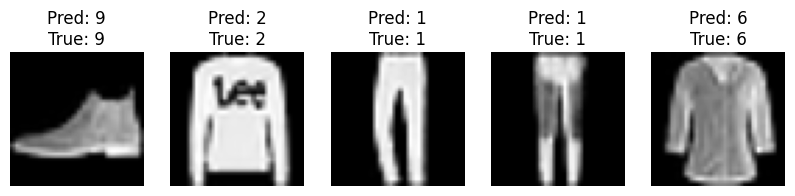

In [14]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions on the first 5 test images
print("\nMaking predictions on the first 5 test images...")
predictions = model.predict(x_test[:5])
predicted_digits = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test[:5], axis=1)

print("Predicted Digits:", predicted_digits)
print("True Digits:", true_labels)

# Visualize predictions
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    # The image data has 3 channels, so we can display just one
    plt.imshow(x_test[i][..., 0], cmap='gray')
    plt.title(f"Pred: {predicted_digits[i]}\nTrue: {true_labels[i]}")
    plt.axis('off')
plt.show()

## ResNet50

In [16]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [17]:
x_train = np.array([tf.image.resize(img[..., np.newaxis], (32, 32)) for img in x_train])
x_test = np.array([tf.image.resize(img[..., np.newaxis], (32, 32)) for img in x_test])

# Repeat the single channel to three channels to simulate RGB
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [18]:
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in resnet_base.layers:
    layer.trainable = False


inputs = Input(shape=(32, 32, 3))
x = resnet_base(inputs)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [19]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test), verbose=1)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.5572 - loss: 1.2551 - val_accuracy: 0.7214 - val_loss: 0.7835
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7297 - loss: 0.7222 - val_accuracy: 0.7435 - val_loss: 0.7032
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7449 - loss: 0.6782 - val_accuracy: 0.7503 - val_loss: 0.6617
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.7577 - loss: 0.6421 - val_accuracy: 0.7414 - val_loss: 0.6762
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.7678 - loss: 0.6238 - val_accuracy: 0.7760 - val_loss: 0.6001



Test Loss: 0.6001
Test Accuracy: 0.7760
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Predicted Digits: [1 2 6 5 7]
True Digits: [1 4 6 5 7]


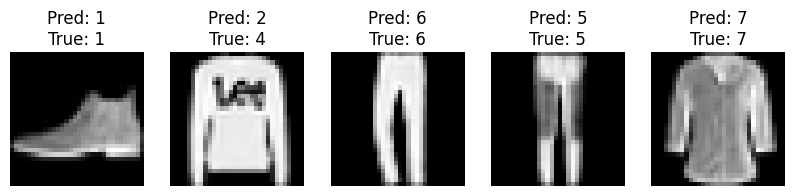

In [20]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

predictions = model.predict(x_test[5:10])
predicted_digits = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test[5:10], axis=1)

print("Predicted Digits:", predicted_digits)
print("True Digits:", true_labels)

# Visualize predictions
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    # Display the grayscale image from one channel
    plt.imshow(x_test[i][..., 0], cmap='gray')
    plt.title(f"Pred: {predicted_digits[i]}\nTrue: {true_labels[i]}")
    plt.axis('off')
plt.show()

# InceptionV3

In [21]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [22]:
x_train = np.array([tf.image.resize(img[..., np.newaxis], (75, 75)) for img in x_train])
x_test = np.array([tf.image.resize(img[..., np.newaxis], (75, 75)) for img in x_test])

x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

from tensorflow.keras.applications.inception_v3 import preprocess_input

x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

In [23]:
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

for layer in inception_base.layers:
    layer.trainable = False

inputs = Input(shape=(75, 75, 3))
x = inception_base(inputs)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [24]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test), verbose=1)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 39ms/step - accuracy: 0.7768 - loss: 0.6484 - val_accuracy: 0.8326 - val_loss: 0.4620
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.8622 - loss: 0.3838 - val_accuracy: 0.8406 - val_loss: 0.4413
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.8818 - loss: 0.3248 - val_accuracy: 0.8473 - val_loss: 0.4332
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.8979 - loss: 0.2775 - val_accuracy: 0.8488 - val_loss: 0.4330
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.9185 - loss: 0.2250 - val_accuracy: 0.8477 - val_loss: 0.4343



Test Loss: 0.4343
Test Accuracy: 0.8477

Making predictions on the first 5 test images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Predicted Digits: [1 4 6 5 7]
True Digits: [1 4 6 5 7]


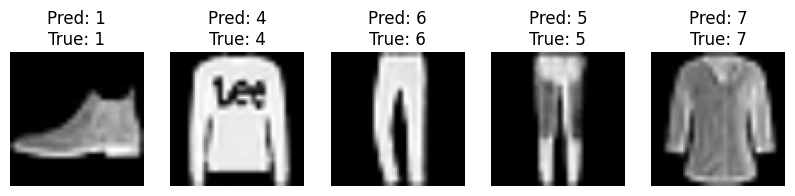

In [25]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions on a few test images
print("\nMaking predictions on the first 5 test images...")
predictions = model.predict(x_test[5:10])
predicted_digits = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test[5:10], axis=1)

print("Predicted Digits:", predicted_digits)
print("True Digits:", true_labels)

# Visualize predictions
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    # The image data has 3 channels, but you can display one to visualize it
    plt.imshow(x_test[i][..., 0], cmap='gray')
    plt.title(f"Pred: {predicted_digits[i]}\nTrue: {true_labels[i]}")
    plt.axis('off')
plt.show()

# MobileNetV2

In [29]:
from tensorflow.keras.applications import MobileNetV2

In [26]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [27]:
# Resize images to 96x96
x_train = np.array([tf.image.resize(img[..., np.newaxis], (96, 96)) for img in x_train])
x_test = np.array([tf.image.resize(img[..., np.newaxis], (96, 96)) for img in x_test])

# Repeat the channel dimension from 1 to 3 to simulate RGB
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Apply MobileNetV2's specific preprocessing
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

In [30]:
# Load the MobileNetV2 model with pre-trained ImageNet weights, excluding the top classifier
mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

# Freeze the MobileNetV2 base layers
for layer in mobilenet_base.layers:
    layer.trainable = False

# Create the new model on top of the MobileNetV2 base
inputs = Input(shape=(96, 96, 3))
x = mobilenet_base(inputs)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [31]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test), verbose=1)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - accuracy: 0.8425 - loss: 0.5034 - val_accuracy: 0.8886 - val_loss: 0.3182
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9173 - loss: 0.2244 - val_accuracy: 0.9055 - val_loss: 0.2648
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9318 - loss: 0.1848 - val_accuracy: 0.8980 - val_loss: 0.3043
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9432 - loss: 0.1517 - val_accuracy: 0.8993 - val_loss: 0.3112
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9532 - loss: 0.1296 - val_accuracy: 0.9045 - val_loss: 0.3052



Test Loss: 0.3052
Test Accuracy: 0.9045

Making predictions on the first 5 test images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicted Digits: [9 2 1 1 0]
True Digits: [9 2 1 1 6]


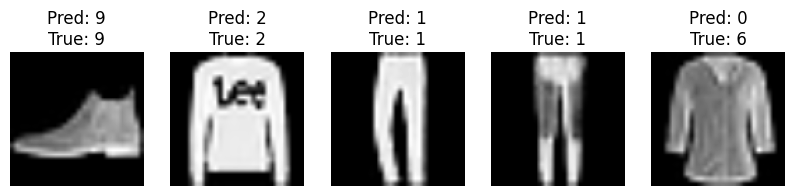

In [32]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions on a few test images
print("\nMaking predictions on the first 5 test images...")
predictions = model.predict(x_test[:5])
predicted_digits = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test[:5], axis=1)

print("Predicted Digits:", predicted_digits)
print("True Digits:", true_labels)

# Visualize predictions
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    # Display the grayscale image from one channel
    plt.imshow(x_test[i][..., 0], cmap='gray')
    plt.title(f"Pred: {predicted_digits[i]}\nTrue: {true_labels[i]}")
    plt.axis('off')
plt.show()